In [1]:
import os
import re
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_concurrency_parallelism(cc_value):
    value = int(sqrt(cc_value))
    return value, value

def process_log_files(directory,string):
    dataframes = []
    for filename in os.listdir(directory):
        if filename.startswith(string) and filename.endswith(".log"):
            full_path = os.path.join(directory, filename)
            if os.stat(full_path).st_size == 0:
                print(f"Skipping empty file: {filename}")
                continue
            with open(full_path, 'r') as file:
                data = []
                last_non_zero_throughput = None
                for line in file:
                    match = re.search(r'(\d+\.\d+).*Throughput @(\d+\.\d+)s:\s+(\d+\.\d+)Gbps, lossRate: (\d+\.\d+|\d+) CC:(\d+)\s+score:(-?\d+\.\d+)\s+rtt:(\d+\.\d+) ms energy:(\d+\.\d+) Jules s-plr:(\d+\.\d+)', line)
                    if match:
                        time = datetime.fromtimestamp(float(match.group(1)))
                        throughput = float(match.group(3))
                        if throughput == 0.00 and last_non_zero_throughput is not None:
                            throughput = last_non_zero_throughput
                        elif throughput != 0.00:
                            last_non_zero_throughput = throughput

                        loss_rate = float(match.group(4))
                        cc = int(match.group(5))
                        score = float(match.group(6))
                        rtt = float(match.group(7))
                        energy = float(match.group(8))
                        sender_lr = float(match.group(9))
                        concurrency, parallelism = get_concurrency_parallelism(cc)
                        data.append([time, throughput, loss_rate, cc, score, rtt, energy, sender_lr, concurrency, parallelism])

                if data:
                    df = pd.DataFrame(data, columns=['Time', 'Throughput', 'receiver_lr', 'CC', 'Score', 'RTT', 'Energy', 'sender_lr', 'concurrency', 'parallelism'])
                    dataframes.append(df)
                else:
                    print(f"No valid data in file: {filename}")
    return dataframes



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-gpmstf9c because the default path (/home/cc/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


                         Time  Throughput  receiver_lr  CC  Score   RTT  \
0  2024-01-13 17:32:49.061663        0.00          0.0   1    0.0   0.0   
1  2024-01-13 17:32:50.067010        0.00          0.0   1    0.0   0.0   
2  2024-01-13 17:32:51.067825        0.00          0.0   1    0.0  32.8   
3  2024-01-13 17:32:52.067940        0.00          0.0   1    0.0  32.5   
4  2024-01-13 17:32:53.068908        0.00          0.0   1    0.0  32.7   
..                        ...         ...          ...  ..    ...   ...   
66 2024-01-13 17:33:55.133766        0.96          0.0  16    1.0  32.8   
67 2024-01-13 17:33:56.134007        0.96          0.0  16    1.0  33.1   
68 2024-01-13 17:33:57.135475        0.96          0.0  16    1.0  32.8   
69 2024-01-13 17:33:58.136813        0.96          0.0  16    1.0  32.7   
70 2024-01-13 17:33:59.137647        0.96          0.0  16    1.0  32.9   

    Energy  sender_lr  concurrency  parallelism  
0      0.0        0.0            1            1  

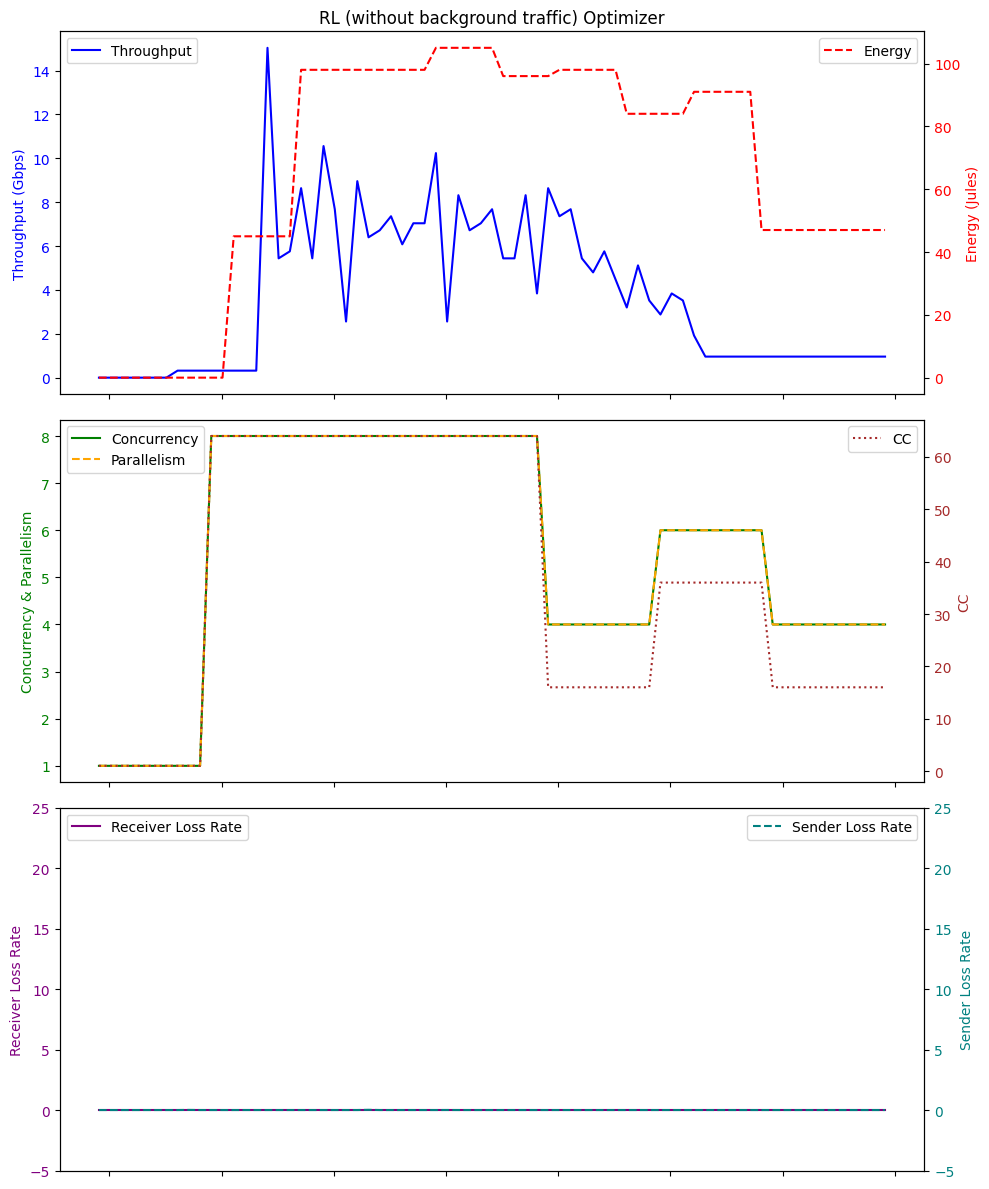

Average Throughput: 3.709295774647885
Total Energy: 4758.0
Total loss rate: 0.03203731129872318
                         Time  Throughput  receiver_lr  CC  Score   RTT  \
0  2024-01-13 17:37:01.193969        0.00          0.0   1    0.0   0.0   
1  2024-01-13 17:37:02.191677        0.00          0.0   1    0.0   0.0   
2  2024-01-13 17:37:03.192063        0.00          0.0   1    0.0  32.9   
3  2024-01-13 17:37:04.194624        0.00          0.0   1    0.0  32.9   
4  2024-01-13 17:37:05.195538        0.00          0.0   1    0.0  32.8   
..                        ...         ...          ...  ..    ...   ...   
56 2024-01-13 17:37:57.245697        1.92          0.0  64    1.0  32.8   
57 2024-01-13 17:37:58.246764        1.92          0.0  64    1.0  32.8   
58 2024-01-13 17:37:59.247697        1.92          0.0  64    1.0  32.9   
59 2024-01-13 17:38:00.249047        1.92          0.0  64    1.0  32.8   
60 2024-01-13 17:38:01.250003        1.92          0.0  64    1.0  32.9   

   

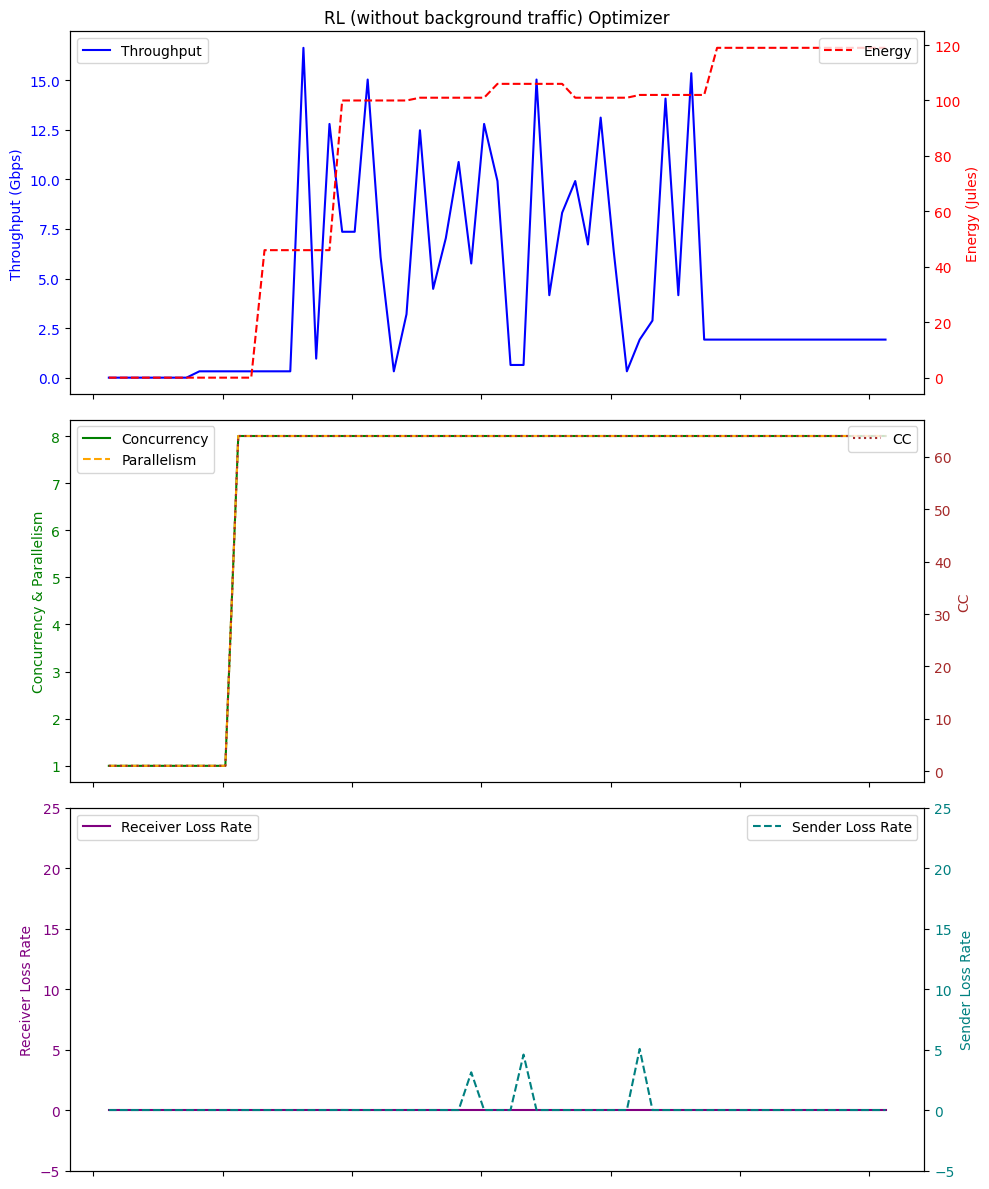

Average Throughput: 4.396065573770494
Total Energy: 4901.0
Total loss rate: 12.768752702837261
                         Time  Throughput  receiver_lr  CC  Score   RTT  \
0  2024-01-13 17:33:59.334263        0.00          0.0   1    0.0   0.0   
1  2024-01-13 17:34:00.330336        0.00          0.0   1    0.0   0.0   
2  2024-01-13 17:34:01.331169        0.00          0.0   1    0.0  32.8   
3  2024-01-13 17:34:02.332568        0.00          0.0   1    0.0  32.8   
4  2024-01-13 17:34:03.332813        0.00          0.0   1    0.0  32.9   
..                        ...         ...          ...  ..    ...   ...   
56 2024-01-13 17:34:55.383423        0.96          0.0  64    0.0  32.8   
57 2024-01-13 17:34:56.385241        0.96          0.0  64    0.0  32.7   
58 2024-01-13 17:34:57.384942        0.96          0.0  64    0.0  32.8   
59 2024-01-13 17:34:58.386509        0.96          0.0  64    0.0  32.8   
60 2024-01-13 17:34:59.387537        0.96          0.0  64    0.0  32.9   

    

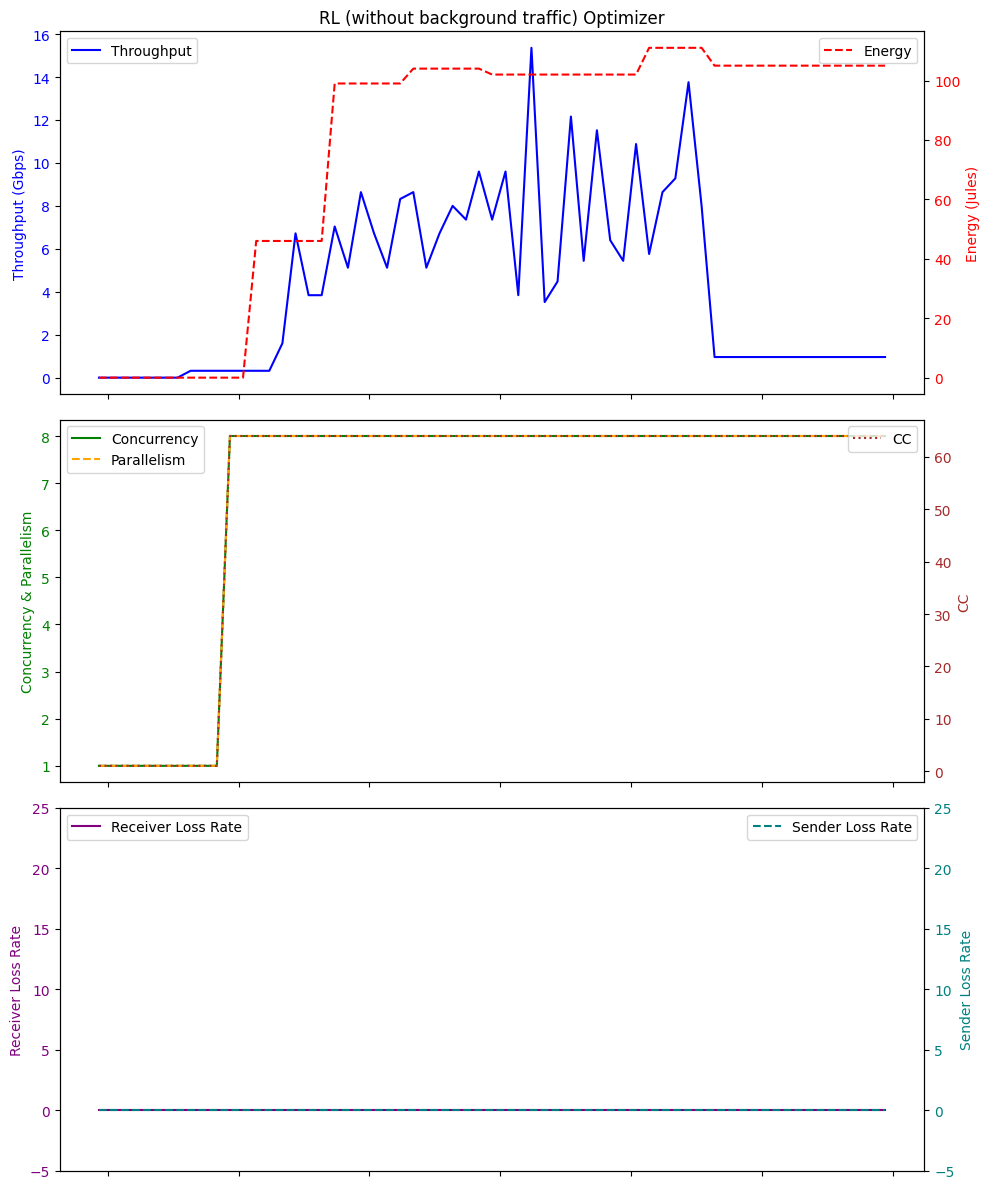

Average Throughput: 4.254426229508196
Total Energy: 4743.0
Total loss rate: 0.0
                         Time  Throughput  receiver_lr  CC  Score   RTT  \
0  2024-01-13 17:35:59.900775        0.00          0.0   1    0.0   0.0   
1  2024-01-13 17:36:00.897468        0.00          0.0   1    0.0   0.0   
2  2024-01-13 17:36:01.898221        0.00          0.0   1    0.0  32.9   
3  2024-01-13 17:36:02.899026        0.00          0.0   1    0.0  32.9   
4  2024-01-13 17:36:03.900672        0.00          0.0   1    0.0  32.9   
..                        ...         ...          ...  ..    ...   ...   
56 2024-01-13 17:36:55.949036       10.24          0.0  64    3.0  32.8   
57 2024-01-13 17:36:56.952183       10.24          0.0  64    3.0  32.9   
58 2024-01-13 17:36:57.953728       10.24          0.0  64    3.0  32.7   
59 2024-01-13 17:36:58.954150       10.24          0.0  64    3.0  32.8   
60 2024-01-13 17:36:59.955401       10.24          0.0  64    3.0  32.8   

    Energy  sender_

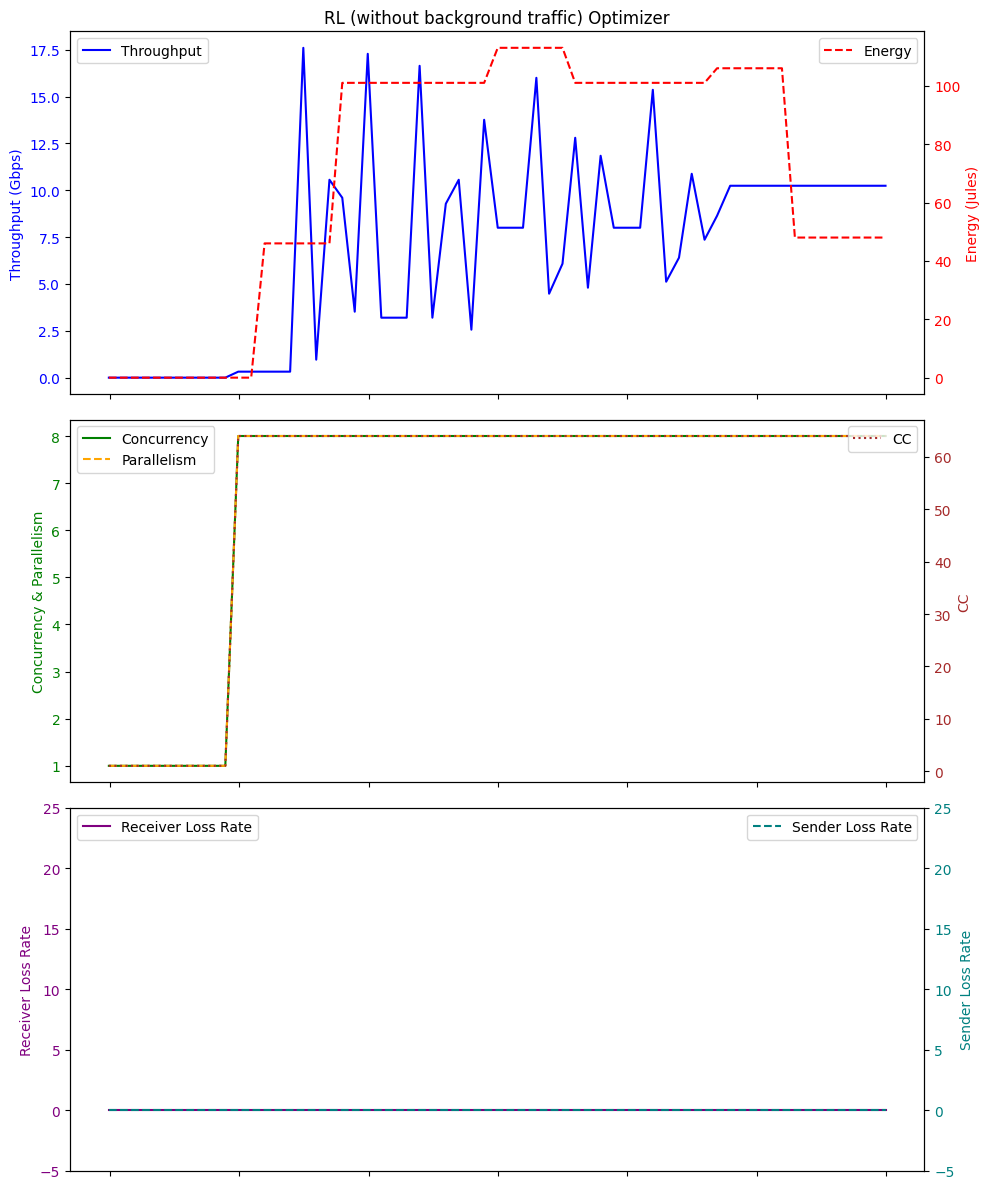

Average Throughput: 6.845901639344262
Total Energy: 4297.0
Total loss rate: 0.0
                         Time  Throughput  receiver_lr  CC  Score   RTT  \
0  2024-01-13 17:34:59.605475        0.00          0.0   1    0.0   0.0   
1  2024-01-13 17:35:00.602205        0.00          0.0   1    0.0   0.0   
2  2024-01-13 17:35:01.601993        0.00          0.0   1    0.0  32.8   
3  2024-01-13 17:35:02.602773        0.00          0.0   1    0.0  32.7   
4  2024-01-13 17:35:03.604170        0.00          0.0   1    0.0  32.8   
..                        ...         ...          ...  ..    ...   ...   
56 2024-01-13 17:35:55.653020        2.24          0.0  64    1.0  32.8   
57 2024-01-13 17:35:56.653770        2.24          0.0  64    1.0  32.8   
58 2024-01-13 17:35:57.655286        2.24          0.0  64    1.0  32.8   
59 2024-01-13 17:35:58.656207        2.24          0.0  64    1.0  33.0   
60 2024-01-13 17:35:59.657398        2.24          0.0  64    1.0  32.9   

    Energy  sender_

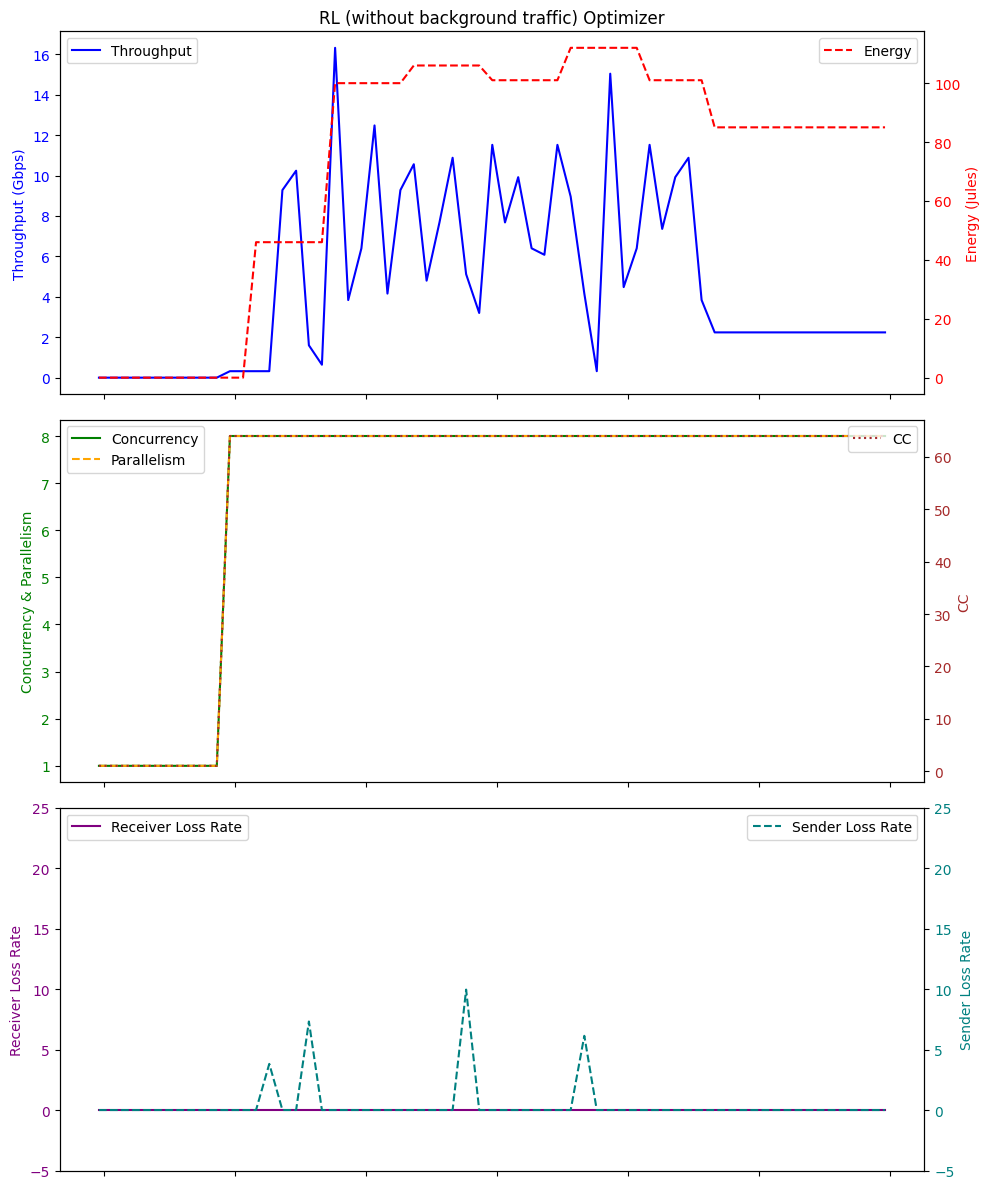

Average Throughput: 4.674098360655739
Total Energy: 4485.0
Total loss rate: 27.23271663613899


In [4]:
# Example usage RL
directory = '/home/cc/transferService/final_code_transferService/ppo_4m_scratch/logFileDir/ppo_sb3_10s_reward_by_difference/'
dfs = process_log_files(directory,"ppo_sb3_10s_reward_by_difference_")

rl_sb_throughput_list=[]
rl_sb_energy_list=[]
rl_sb_plr_list=[]
# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('RL (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['CC'], label='CC', color='brown', linestyle=':')
    ax3_twin.set_ylabel('CC', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)

    ax3.set_ylim(-5,25)

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
    plt.show()

    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)
    total_energy = df['Energy'].sum()
    print("Total Energy:", total_energy)
    total_plr = df['sender_lr'].sum()
    print("Total loss rate:", total_plr)
    
    rl_sb_throughput_list.append(average_throughput)
    rl_sb_energy_list.append(total_energy)
    rl_sb_plr_list.append(total_plr)


In [5]:
result_dictionary={"Throughput":[rl_sb_throughput_list],"Energy":[rl_sb_energy_list],"lossRate":[rl_sb_plr_list]}
print(result_dictionary)

{'Throughput': [[3.709295774647885, 4.396065573770494, 4.254426229508196, 6.845901639344262, 4.674098360655739]], 'Energy': [[4758.0, 4901.0, 4743.0, 4297.0, 4485.0]], 'lossRate': [[0.03203731129872318, 12.768752702837261, 0.0, 0.0, 27.23271663613899]]}


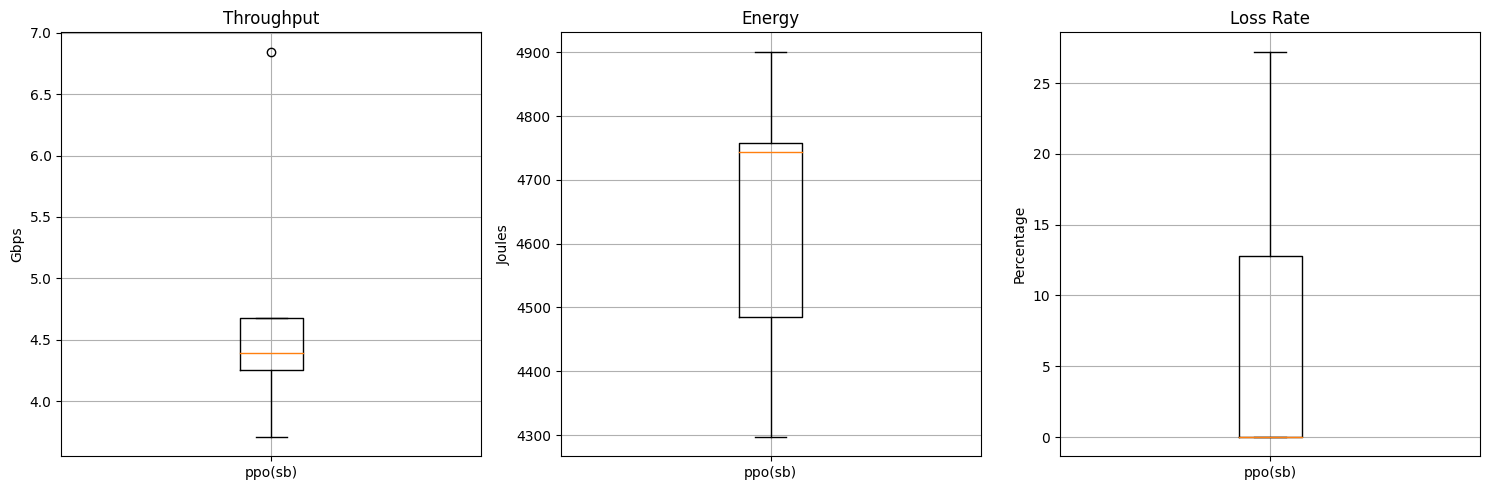

In [7]:
result_dictionary={'Throughput': [[3.709295774647885, 4.396065573770494, 4.254426229508196, 6.845901639344262, 4.674098360655739]], 'Energy': [[4758.0, 4901.0, 4743.0, 4297.0, 4485.0]], 'lossRate': [[0.03203731129872318, 12.768752702837261, 0.0, 0.0, 27.23271663613899]]}

import matplotlib.pyplot as plt
labels = ['ppo(sb)']

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting Throughput
axes[0].boxplot(result_dictionary['Throughput'], labels=labels)
axes[0].set_title('Throughput')
axes[0].set_ylabel('Gbps')
axes[0].grid(True)  # Adding grid


# Plotting Energy
axes[1].boxplot(result_dictionary['Energy'], labels=labels)
axes[1].set_title('Energy')
axes[1].set_ylabel('Joules')
axes[1].grid(True)  # Adding grid

# Plotting Loss Rate
axes[2].boxplot(result_dictionary['lossRate'], labels=labels)
axes[2].set_title('Loss Rate')
axes[2].set_ylabel('Percentage')
axes[2].grid(True)  # Adding grid

plt.tight_layout()
plt.show()